In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import sklearn as sk

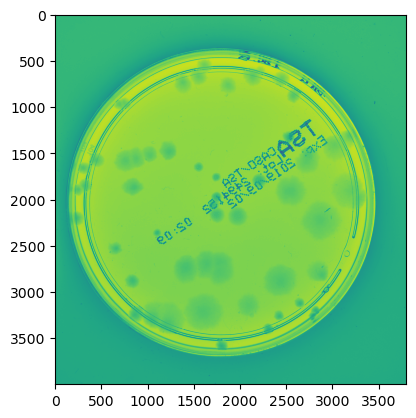

In [3]:
img = cv.imread("data/train_data/408.jpg", 0)
plt.imshow(img)

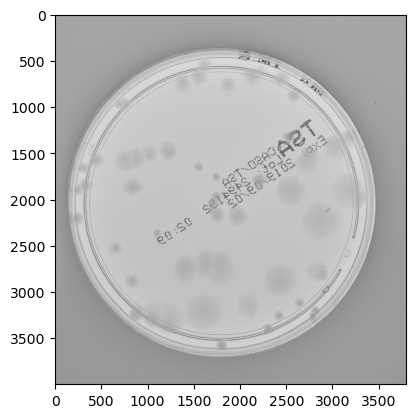

In [4]:
#blur the image
cimg = cv.cvtColor(img, cv.COLOR_GRAY2BGR)
#blur = cv.GaussianBlur(cimg,(151,151),150)
plt.imshow(cimg)

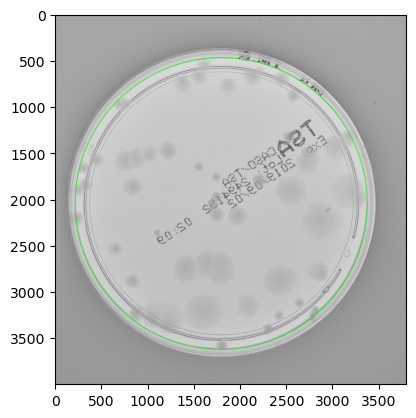

In [5]:
circles = cv.HoughCircles(img, cv.HOUGH_GRADIENT, 
                          4, 10000, param1=200, param2=200, 
                          minRadius=1500, maxRadius=1800)

circles = np.uint16(np.around(circles)) #round the values to whole numbers and make them of type int

for c in circles[0, :]:
    cv.circle(cimg, (c[0], c[1]), c[2], (0, 255, 0), 5) #draw the outer circle
    cv.circle(cimg, (c[0], c[1]), 1, (0, 0, 255), 5) #draw circle center

plt.imshow(cimg)

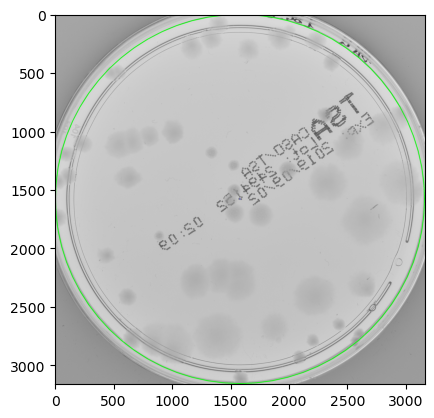

In [7]:
import cv2
import numpy as np

# Load the image
image = cimg

# Convert the image to HSV color space
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define the range of colors for the petri dish (green color)
lower_green = np.array([40, 40, 40])
upper_green = np.array([80, 255, 255])

# Threshold the HSV image to get only green colors (the petri dish)
mask = cv2.inRange(hsv, lower_green, upper_green)

# Find contours in the mask
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filter contours based on area to remove small noise
min_area = 1000  # Adjust as needed
contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_area]

# Crop and save bounding boxes
for i, contour in enumerate(contours):
    x, y, w, h = cv2.boundingRect(contour)
    
    # Crop the bounding box region
    cropped_image = image[y:y+h, x:x+w]
    
    #show the cropped image
    plt.imshow(cropped_image)

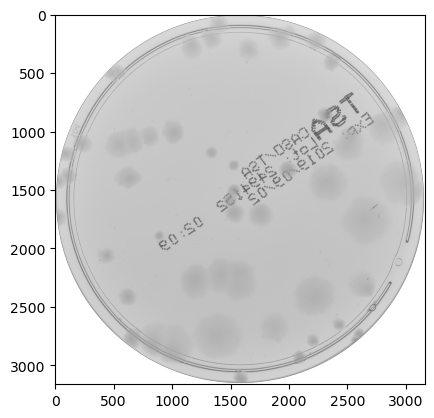

In [11]:
import cv2
import numpy as np

def mask_circle(image):
    # Get image dimensions
    height, width = image.shape[:2]

    # Create a black image with alpha channel
    mask = np.zeros((height, width, 4), dtype=np.uint8)

    # Calculate circle parameters
    center = (width // 2, height // 2)
    radius = min(center[0], center[1])-10

    # Draw the circle on the mask
    cv2.circle(mask, center, radius, (255, 255, 255, 255), -1)

    # Set the alpha channel of the input image to 0 outside the circle
    image_with_alpha = np.concatenate((image, np.full((height, width, 1), 255, dtype=np.uint8)), axis=-1)
    image_with_alpha[mask[:, :, 3] == 0] = [0, 0, 0, 0]

    return image_with_alpha

# Example usage
image_with_alpha = mask_circle(cropped_image)

# Display or save the resulting image
plt.imshow(image_with_alpha)

In [ ]:
# cut out the green rim